# デモ：音
プログラムで音を作ります。\
左右のスピーカーから異なる音を出すことで、ステレオ感を演出してみましょう。\
スピーカーがモノラル(1ch)の場合、ステレオ(2ch)は強制的にモノラル再生となります。イヤホンやヘッドホンを使うと、ステレオ感を感じやすくなります。



In [1]:
# Python, セルマジックcppの定義
from IPython.display import Audio
from IPython.core.magic import register_cell_magic
@register_cell_magic
def cpp(line, cell):
    program = 'a.out'
    option = ''
    if line == '':
        line = '_temp.cpp'
    with open(line, 'w') as f:
        f.write(cell)
    ipy = get_ipython()
    ret = ipy.getoutput(f'g++ {line} -o {program} {option}')
    if len(ret) != 0:
        for error in ret:
            print(error)
    else:
        ret = ipy.getoutput(f'./{program}')
        for error in ret:
            print(error)
        if len(ret) == 0:
            return Audio("test.wav")
    return

In [2]:
# Waveファイルを作るためのヘッダファイルをダウンロードします。
!wget https://raw.githubusercontent.com/daigokk/wave/main/wave.hpp

--2021-08-06 09:19:35--  https://raw.githubusercontent.com/daigokk/wave/main/wave.hpp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2624 (2.6K) [text/plain]
Saving to: ‘wave.hpp.1’

wave.hpp.1          100%[===================>]   2.56K  --.-KB/s    in 0s      

2021-08-06 09:19:36 (53.1 MB/s) - ‘wave.hpp.1’ saved [2624/2624]



In [3]:
%%cpp
#include "wave.hpp"
#include <math.h>
#include <vector>
#define PI acos(-1)

int main(void)
{
    wave pcm(10);
    for(int i = 0; i < pcm.size; i++)
    {
        double amp_right = 1;
        double amp_left = 1;
        double freq;
        if(i < pcm.size * 1 / 10) freq = 261.626;
        else if(i < pcm.size * 2 / 10) freq = 293.665;
        else if(i < pcm.size * 3 / 10) freq = 329.628;
        pcm.s[0][i] = amp_right * sin(2 * PI * freq / pcm.fs * i);
        pcm.s[1][i] = amp_left *  sin(2 * PI * freq / pcm.fs * i);
    }
    pcm.write("test.wav");
    return 0;
}

In [4]:
%%cpp
#include "wave.hpp"
#include <math.h>
#define PI acos(-1)

int main(void)
{
    wave pcm(10);
    for(int i = 0; i < pcm.size; i++)
    {
        double amp_right = sin(2 * PI * 0.25 / pcm.fs * i + PI / 2);
        double amp_left = sin(2 * PI * 0.25 / pcm.fs * i);
        double freq;
        if(i < pcm.size * 1 / 10) freq = 261.626;
        else if(i < pcm.size * 2 / 10) freq = 293.665;
        else if(i < pcm.size * 3 / 10) freq = 329.628;
        pcm.s[0][i] = amp_right * sin(2 * PI * freq / pcm.fs * i);
        pcm.s[1][i] = amp_left *  sin(2 * PI * freq / pcm.fs * i);
    }
    pcm.write("test.wav");
    return 0;
}

In [5]:
%%cpp
#include "wave.hpp"
#include <math.h>
#define PI acos(-1)

int main(void)
{
    wave pcm(10);
    for(int i = 0; i < pcm.size; i++)
    {
        double amp_right = exp(-pow(i - pcm.fs * 5, 2) / (2 * pow(pcm.size/10, 2)));
        double amp_left = exp(-pow(i - pcm.fs * 3, 2) / (2 * pow(pcm.size/10, 2)));
        double freq = 329.628;
        pcm.s[0][i] = amp_right * sin(2 * PI * freq / pcm.fs * i);
        pcm.s[1][i] = amp_left *  sin(2 * PI * freq / pcm.fs * i);
    }
    pcm.write("test.wav");
    return 0;
}

In [6]:
!wget https://raw.githubusercontent.com/lava/matplotlib-cpp/master/matplotlibcpp.h
# Python, セルマジックcppの定義
from IPython.display import display, Image
from IPython.core.magic import register_cell_magic
@register_cell_magic
def cpp(line, cell):
    program = 'a.out'
    option = '-I/usr/include/python3.7 -lpython3.7m -I/usr/local/lib/python3.7/dist-packages/numpy/core/include'
    if line == '':
        line = '_temp.cpp'
    with open(line, 'w') as f:
        f.write(cell)
    ipy = get_ipython()
    ret = ipy.getoutput(f'g++ {line} -o {program} {option}')
    if len(ret) != 0:
        for error in ret:
            print(error)
    else:
        ret = ipy.getoutput(f'./{program}')
        for error in ret:
            print(error)
        if len(ret) != 0 and ret[0] == '<Figure size 640x480 with 1 Axes>':
            display(Image('chart.png'))
            return Audio("test.wav")
    return

--2021-08-06 09:19:37--  https://raw.githubusercontent.com/lava/matplotlib-cpp/master/matplotlibcpp.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99741 (97K) [text/plain]
Saving to: ‘matplotlibcpp.h.1’

matplotlibcpp.h.1   100%[===================>]  97.40K  --.-KB/s    in 0.005s  

2021-08-06 09:19:38 (18.8 MB/s) - ‘matplotlibcpp.h.1’ saved [99741/99741]



<Figure size 640x480 with 1 Axes>


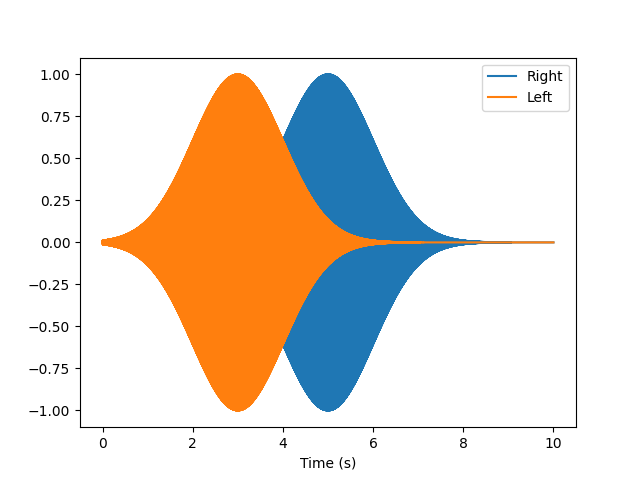

In [7]:
%%cpp
#include "wave.hpp"
#include <math.h>
#define PI acos(-1)
#include <vector>
#include "matplotlibcpp.h"
namespace plt = matplotlibcpp;

void chart(wave& pcm);

int main(void)
{
    wave pcm(10);
    for(int i = 0; i < pcm.size; i++)
    {
        double amp_right = exp(-pow(i - pcm.fs * 5, 2) / (2 * pow(pcm.size/10, 2)));
        double amp_left = exp(-pow(i - pcm.fs * 3, 2) / (2 * pow(pcm.size/10, 2)));
        double freq = 329.628;
        pcm.s[0][i] = amp_right * sin(2 * PI * freq * i / pcm.fs);
        pcm.s[1][i] = amp_left *  sin(2 * PI * freq * i / pcm.fs);
    }
    pcm.write("test.wav");
    chart(pcm);
    return 0;
}

void chart(wave& pcm)
{
    std::vector<double> t(pcm.size), left(pcm.size), right(pcm.size);
    for(int i = 0; i < pcm.size; i++)
    {
        t[i] = (double)i / pcm.fs;
        right[i] = pcm.s[0][i];
        left[i] = pcm.s[1][i];
    }
    plt::named_plot("Right", t, right);
    plt::named_plot("Left", t, left);
    plt::legend();
    plt::xlabel("Time (s)");
    plt::save("chart.png");
    plt::show();
}